In [57]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys

sys.path.append("incl/")

import ELPH_utils
import ELPH_Dim_Reducer

from RedDimApprox import RedDimApprox

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
runs = ELPH_utils.load_runs(filename='../runs_n_kmax=80.npz')

# runs = runs[:100:1]
# for k in range(len(runs)):
#     runs[k] = runs[k][:,::2]

n_runs = len(runs)
n_kmax = runs[0].shape[0]

print(n_runs, 'loaded with n_kmax =', n_kmax)

1000 loaded with n_kmax = 80


In [71]:
# dim_reducer = ELPH_Dim_Reducer.SVD()
# dim_reducer = ELPH_Dim_Reducer.FFT(sorted=True)
dim_reducer = ELPH_Dim_Reducer.Hermite(sample_max = 1.856, sorted=True, optimize=False, orthogonalize=True)

model = RedDimApprox(runs, dim_reducer)
model.train()

print(model.get_error(runs[9], rdim=40, norm='std'))

0.0034461382018877097


In [79]:
# dim_reducer = ELPH_Dim_Reducer.SVD()
# dim_reducer = ELPH_Dim_Reducer.FFT(sorted=True)
dim_reducer = ELPH_Dim_Reducer.Hermite(sample_max = 1.856, sorted=True, optimize=False, orthogonalize=True)

model = RedDimApprox(dim_reducer=dim_reducer)

train_kwargs = {}
score_kwargs = {'norm':'max', 'rdim':77}

m,s = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs=train_kwargs, score_kwargs=score_kwargs)

print(m)
print(s)

0.009657507553830767
[0.011355584780331747, 0.010419908861905748, 0.00849554311403922, 0.010448412438862664, 0.007568088574014455]


In [ ]:
norm = 'max'
threshold = 0.01

n_kmax_ar = [10,20,30,40,50,60,70,80,90,100,110,120,130,140]

# dim_reducer = ELPH_Dim_Reducer.SVD()
# dim_reducer = ELPH_Dim_Reducer.FFT(sorted=True)
dim_reducer = ELPH_Dim_Reducer.Hermite(sample_max = 1.856, sorted=True, optimize=True, orthogonalize=True)

model = RedDimApprox(dim_reducer=dim_reducer)

rdim_buffer = 5
previous_min_rdim = 1 + rdim_buffer
min_rdim_ar = []

for k, n_kmax in enumerate(n_kmax_ar):
    runs = ELPH_utils.load_runs(filename='../runs_n_kmax='+str(n_kmax)+'.npz')
    n_runs = len(runs)
    assert n_kmax == runs[0].shape[0]
    
    print(n_runs, 'loaded with n_kmax =', n_kmax)
    
    for rdim in range(previous_min_rdim-rdim_buffer,n_kmax+1):
        score_kwargs = {'norm':norm, 'rdim':rdim}
        m,s = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs={}, score_kwargs=score_kwargs)
#         print('rdim:', rdim, 'mean score', m)
        
        if m < threshold:
            previous_min_rdim = rdim
            min_rdim_ar.append(rdim)
            print('min rdim:', rdim, 'mean score', m)
            break
            
    if m > threshold:        
        min_rdim_ar.append(rdim)
        print('max rdim reached:', rdim, 'mean score', m)
    

1000 loaded with n_kmax = 10
min rdim: 10 mean score 5.817568649035821e-16
1000 loaded with n_kmax = 20
min rdim: 20 mean score 7.842615445952106e-16
1000 loaded with n_kmax = 30
min rdim: 30 mean score 9.177105080092166e-16
1000 loaded with n_kmax = 40


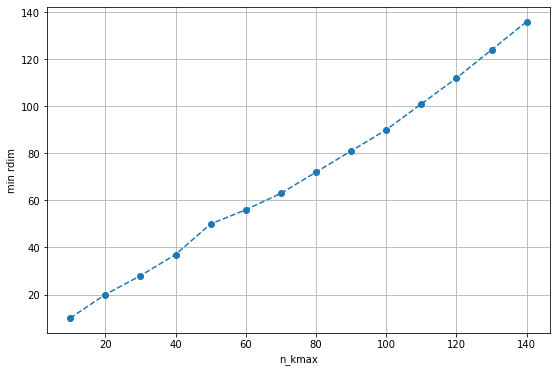

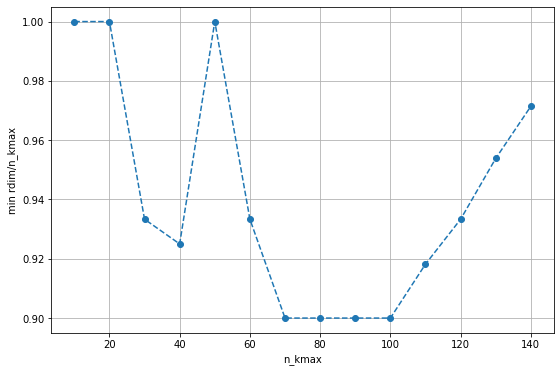

In [3]:
n_kmax_ar = np.asarray(n_kmax_ar)
min_rdim_ar = np.asarray(min_rdim_ar)


plt.grid()
plt.plot(n_kmax_ar,min_rdim_ar, '--', marker='o')
plt.xlabel('n_kmax')
plt.ylabel('min rdim')
plt.show()


plt.grid()
plt.plot(n_kmax_ar,min_rdim_ar/n_kmax_ar, '--', marker='o')
plt.xlabel('n_kmax')
plt.ylabel('min rdim/n_kmax')
plt.show()